<a href="https://colab.research.google.com/github/d2uixuji/zs/blob/main/%E4%BD%BF%E7%94%A8%E6%B1%BA%E7%AD%96%E6%A8%B9%E9%80%B2%E8%A1%8C%E7%97%85%E4%BA%BA%E7%94%A8%E8%97%A5%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 使用決策樹進行分類

## 匯入資料與分析資料

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
dfs = pd.read_csv('https://raw.githubusercontent.com/d2uixuji/zs/main/student-performance-in-exams.ipynb')
print(dfs.head(10))
print(dfs.shape)
print(dfs.dtypes)
print(dfs.isnull().values.any())  #檢查整張DataFrame是否有NaN
print(dfs.isnull().values.sum())  #檢查整張DataFrame有幾個NaN

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY
5   22   F  NORMAL        HIGH    8.607  drugX
6   49   F  NORMAL        HIGH   16.275  drugY
7   41   M     LOW        HIGH   11.037  drugC
8   60   M  NORMAL        HIGH   15.171  drugY
9   43   M     LOW      NORMAL   19.368  drugY
(200, 6)
Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object
False
0
['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']
['drugA' 'drugB' 'drugC' 'drugX' 'drugY']


# 資料的前處理

In [ ]:
from sklearn import preprocessing
df = dfs
LE_sex = preprocessing.LabelEncoder()
LE_sex.fit(['F','M'])
df['Sex'] = LE_sex.transform(df['Sex'])
LE_bp = preprocessing.LabelEncoder()
LE_bp.fit(['NORMAL', 'HIGH', 'LOW'])
df['BP'] = LE_bp.transform(df['BP'])
LE_cho = preprocessing.LabelEncoder()
LE_cho.fit(['NORMAL', 'HIGH'])
df['Cholesterol'] = LE_cho.transform(df['Cholesterol'])
print(df.head(10))

   Age  Sex  BP  Cholesterol  Na_to_K   Drug
0   23    0   0            0   25.355  drugY
1   47    1   1            0   13.093  drugC
2   47    1   1            0   10.114  drugC
3   28    0   2            0    7.798  drugX
4   61    0   1            0   18.043  drugY
5   22    0   2            0    8.607  drugX
6   49    0   2            0   16.275  drugY
7   41    1   1            0   11.037  drugC
8   60    1   2            0   15.171  drugY
9   43    1   1            1   19.368  drugY


# random_state用途

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X1 = np.arange(20).reshape((10, 2))
Y1 = range(10)
for i in range(3):
    print(train_test_split(X1, Y1, test_size=0.3, random_state=3))

[array([[ 4,  5],
       [18, 19],
       [12, 13],
       [14, 15],
       [ 0,  1],
       [ 6,  7],
       [16, 17]]), array([[10, 11],
       [ 8,  9],
       [ 2,  3]]), [2, 9, 6, 7, 0, 3, 8], [5, 4, 1]]
[array([[ 4,  5],
       [18, 19],
       [12, 13],
       [14, 15],
       [ 0,  1],
       [ 6,  7],
       [16, 17]]), array([[10, 11],
       [ 8,  9],
       [ 2,  3]]), [2, 9, 6, 7, 0, 3, 8], [5, 4, 1]]
[array([[ 4,  5],
       [18, 19],
       [12, 13],
       [14, 15],
       [ 0,  1],
       [ 6,  7],
       [16, 17]]), array([[10, 11],
       [ 8,  9],
       [ 2,  3]]), [2, 9, 6, 7, 0, 3, 8], [5, 4, 1]]


## 分割訓練資料與測試資料

In [ ]:
from sklearn.model_selection import train_test_split
y=df['Drug']
X=df.drop(['Drug'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 5)
(140,)
(60, 5)
(60,)


## 使用決策樹進行分類

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
drugTree = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=5)
drugTree.fit(X_train,y_train)
pred = drugTree.predict(X_test)
print(pred[:10])
print(y_test[:10])
print("正確率為", metrics.accuracy_score(y_test, pred))


['drugY' 'drugX' 'drugC' 'drugC' 'drugC' 'drugC' 'drugY' 'drugA' 'drugB'
 'drugA']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
82     drugC
183    drugY
46     drugA
70     drugB
100    drugA
Name: Drug, dtype: object
正確率為 0.8166666666666667


## 調整決策樹的max_leaf_nodes找出最高正確率

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
def tree(num):
    drugTree = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = num)
    drugTree.fit(X_train,y_train)
    pred = drugTree.predict(X_test)
    print("正確率為", metrics.accuracy_score(y_test, pred))
for i in range(2,10):
    tree(i)

正確率為 0.7
正確率為 0.8166666666666667
正確率為 0.9
正確率為 0.8166666666666667
正確率為 0.9833333333333333
正確率為 0.9833333333333333
正確率為 0.9833333333333333
正確率為 0.9833333333333333


## 繪製決策樹

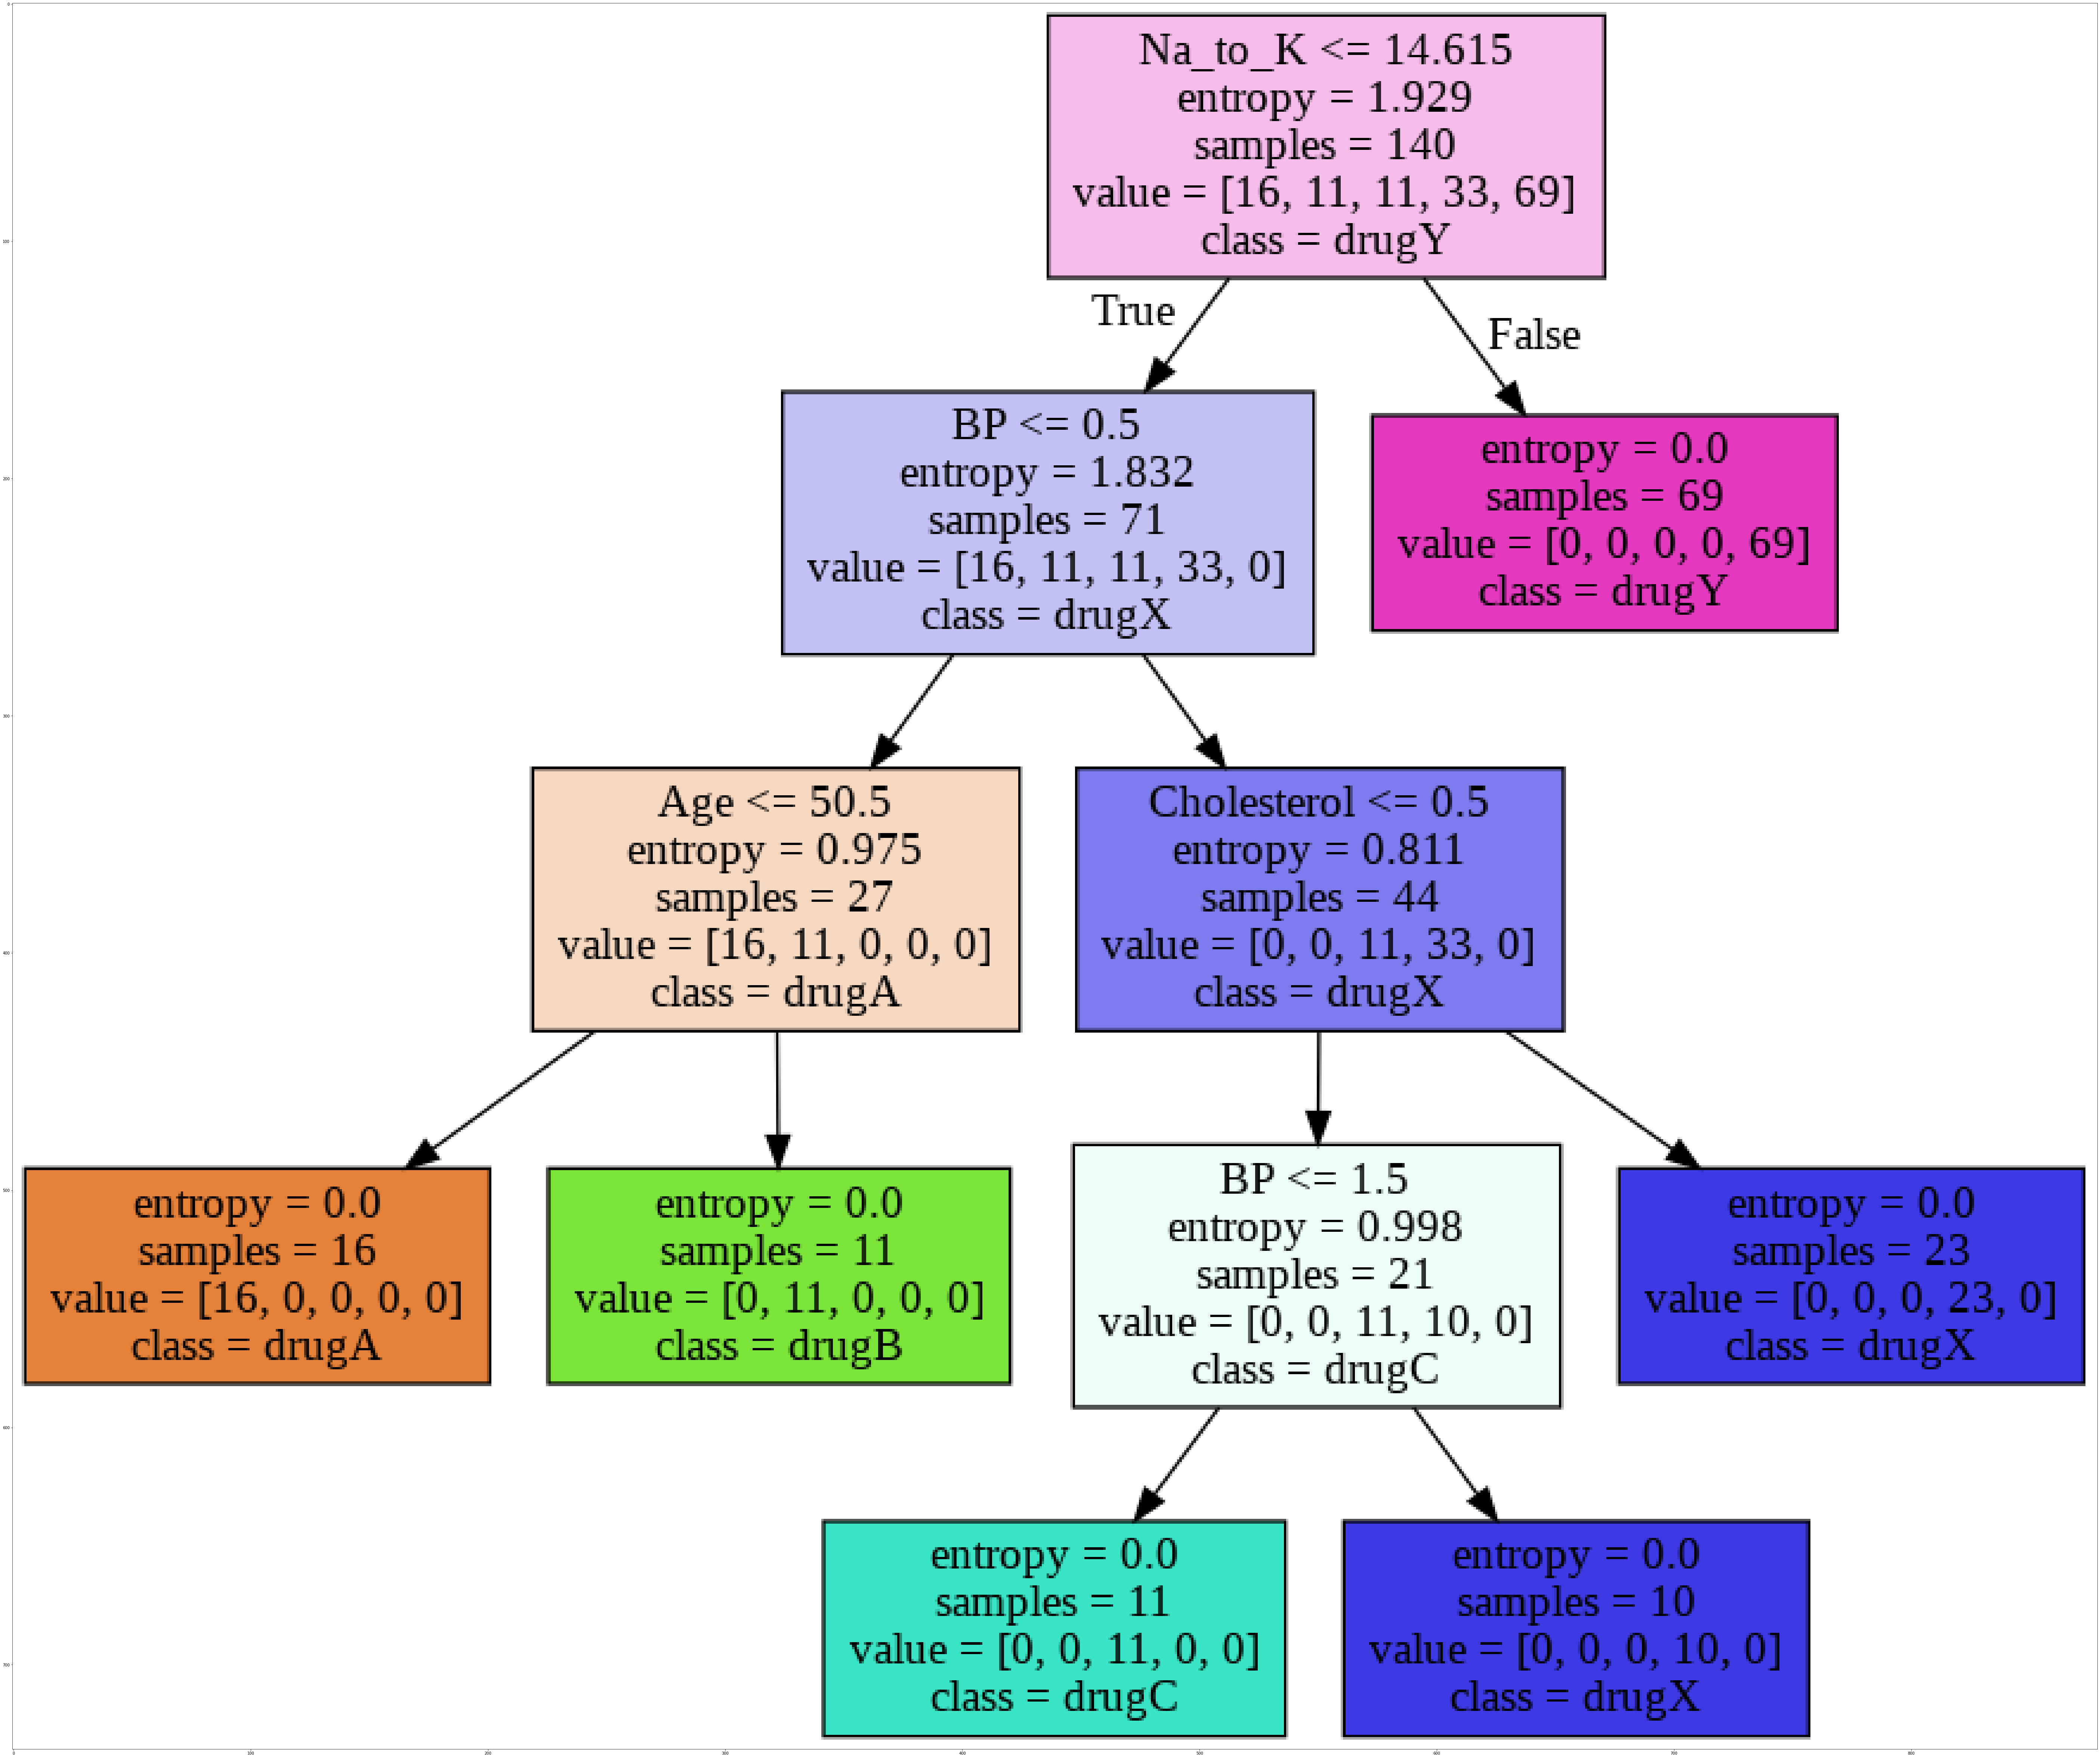

In [ ]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
drugTree = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = 6)
drugTree.fit(X_train,y_train)
pred = drugTree.predict(X_test)
io = StringIO()
filename = "決策樹.png"
column_names = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
tree.export_graphviz(drugTree,feature_names=column_names, out_file=io, class_names= np.unique(y_train), filled=True)
graph = pydotplus.graph_from_dot_data(io.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img)
